# Assignment8

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [235]:
df = pd.read_csv("car_data.csv")

In [236]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [238]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# **Task 1**

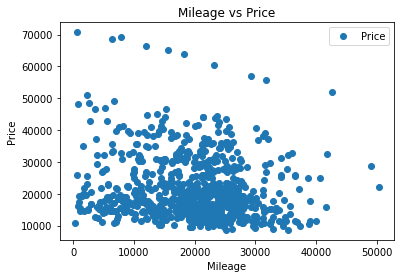

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


In [239]:
df.plot(x = 'Mileage', y = 'Price',style = 'o')
plt.title('Mileage vs Price')
plt.ylabel('Price')
plt.show()
df[["Price","Mileage"]].corr()

### Detecting Outliers in Mileage and Price column

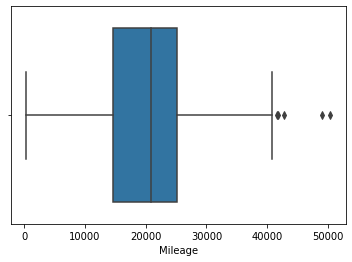

In [240]:
sns.boxplot(x = 'Mileage',data = df)

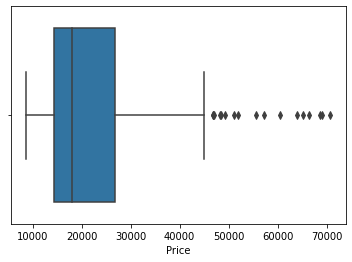

In [241]:
sns.boxplot(x = 'Price',data = df)

There are outliers in both columns.
We are deleting the outliers,we cannot cap the mileage.

In [242]:
for i in ['Price','Mileage']:
  p25 = df[i].quantile(0.25)
  p75 = df[i].quantile(0.75)
  iqr = p75 - p25
  upper_limit = p75 + (iqr * 1.5)
  lower_limit = p25 - (iqr * 1.5)
  print(i," ul :",upper_limit," ll :",lower_limit)
  # u_ndx = df[df[i] > upper_limt].index
  # l_ndx = df[df[i] < lower_limt].index
  #df.drop(u_ndx,axis = 0,inplace = True)
  #df.drop(l_ndx,axis = 0,inplace = True)
  df[i] = np.where(
    df[i]>upper_limit,
    upper_limit,
    np.where(
        df[i]<lower_limit,
        lower_limit,
        df[i]
      )
  )

Price  ul : 45383.68078365926  ll : -4393.290277667038
Mileage  ul : 41097.25  ll : -1260.75


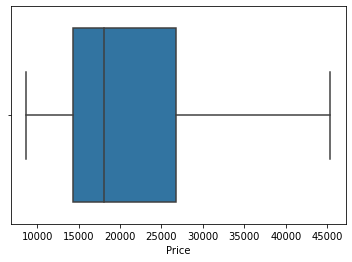

In [243]:
sns.boxplot(x = 'Price',data = df)

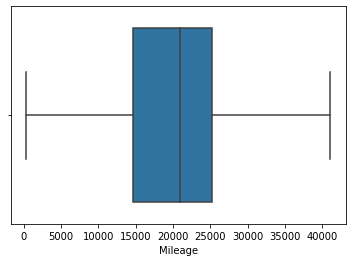

In [244]:
sns.boxplot(x = 'Mileage',data = df)

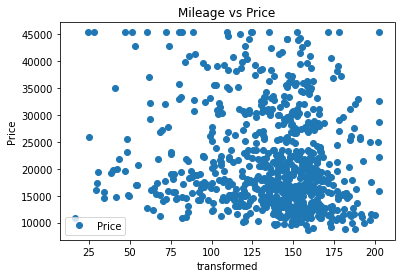

,Price,transformed
Price,1.000000,-0.139577
transformed,-0.139577,1.000000


In [245]:
df['transformed'] = np.sqrt(df['Mileage'])
df.plot(x = 'transformed', y = 'Price',style = 'o')
plt.title('Mileage vs Price')
plt.ylabel('Price')
plt.show()
df[["Price","transformed"]].corr()

Tried many transformation of the Mileage column. There is no linear relationship.

In [246]:
x = df[["Mileage"]]
y = df["Price"]

In [247]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [248]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

1.Printing Linear Regression Equation for Mileage vs Price

In [249]:
print(f'Equation : y = {model.coef_} * x + {model.intercept_}')

Equation : y = [-0.15460272] * x + 24162.22781597857


2.Chart the original data and the equation on the chart.

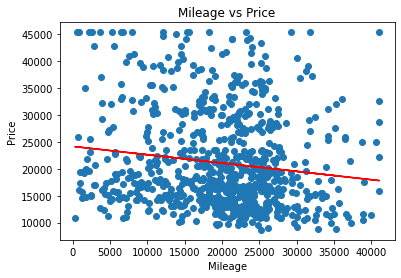

In [250]:
plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

3. Find the equation's  R2  score 

In [251]:
model.score(x,y)

0.019320064107941737

This score is not good one.


# **Task 2**

In [252]:
x = df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']]
y = df['Price']

In [253]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [254]:
print("Equation : y =",end ='')
for i in range(0,6):
   print(f"({model.coef_[i]}) * x{i+1} + ", end = '')
print(model.intercept_)

Equation : y =(-0.15447674652992768) * x1 + (2250.5356028518963) * x2 + (792.2621270887045) * x3 + (-933.18091580839) * x4 + (6192.565645875235) * x5 + (-2317.993242036793) * x6 + 7822.317553310371


2.Find the equation's  R2  score 

In [255]:
model.score(x,y)

0.45846180424222216

Model score is not good one.

3.Find the combination of the factors that is the best predictor for price.

In [256]:
from itertools import combinations


combos = []
for i in range(1,8):
    combos.append(combinations(x,i))

In [257]:
score = 0
for i in combos:
  for j in i:
    x = df[list(j)]
    y = df['Price']
    model.fit(x,y)
    if score < model.score(x, y):
            score = model.score(x, y)
            group = list(j)

In [258]:
print('Combination of the factors that is the best predictor for price -',group,', R2 Score :',score)

Combination of the factors that is the best predictor for price - ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] , R2 Score : 0.45846180424222216


# **Task 3**

In [259]:
df_dummy = pd.get_dummies(df,columns = ['Make','Model','Type'])

In [260]:
df_dummy

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,transformed,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221.0,Sedan 4D,6,3.1,4,1,1,1,90.669730,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135.0,Sedan 4D,6,3.1,4,1,1,0,95.577194,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196.0,Sedan 4D,6,3.1,4,1,1,0,114.873844,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342.0,Sedan 4D,6,3.1,4,1,0,0,127.835832,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832.0,Sedan 4D,6,3.1,4,1,0,1,140.826134,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,L300 Sedan 4D,6,3.0,4,1,0,0,127.393092,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,19095.0,L300 Sedan 4D,6,3.0,4,1,1,0,138.184659,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,20484.0,L300 Sedan 4D,6,3.0,4,1,1,0,143.122325,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,25979.0,L300 Sedan 4D,6,3.0,4,1,1,0,161.180024,...,0,0,0,0,0,0,0,0,1,0


In [261]:
x = df_dummy[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']]
y = df_dummy['Price']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [262]:
print(
'Coefficient:',model.coef_,
'\nIntercept:',model.intercept_,    
'\nScore:',model.score(x,y)
)

Coefficient: [-1.65447071e-01 -1.74039301e+03  6.33156952e+03 -1.30669924e+03
  1.14601815e+02 -2.22359103e+02  1.87479937e+02 -3.57434731e+03
 -5.07502819e+03 -5.22871694e+03  8.07169787e+03  1.07357079e+04
 -4.92931334e+03 -1.25417594e+03 -3.79070340e+03  1.89166254e+03
 -1.29083621e+03  4.44405302e+03] 
Intercept: 21453.876696795458 
Score: 0.9521258925465841


Best combination of features for predicting price is already done in Task 2

In [263]:
print('Combination of the factors that is the best predictor for price -',group,', R2 Score :',score)

Combination of the factors that is the best predictor for price - ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] , R2 Score : 0.45846180424222216
